In [64]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = torch.load('./data/test/test/_2020_10_09_11_17_00_0000--s-0/params.pkl')

In [3]:
net

{'trainer/policy': TanhGaussianPolicy(
   (fc0): Linear(in_features=2, out_features=16, bias=True)
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (last_fc): Linear(in_features=16, out_features=1, bias=True)
   (last_fc_log_std): Linear(in_features=16, out_features=1, bias=True)
 ),
 'trainer/qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=16, bias=True)
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (last_fc): Linear(in_features=16, out_features=1, bias=True)
 ),
 'trainer/qf2': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=16, bias=True)
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (last_fc): Linear(in_features=16, out_features=1, bias=True)
 ),
 'trainer/target_qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=16, bias=True)
   (fc1): Linear(in_features=16, out_features=16, bias=True)
   (last_fc): Linear(in_features=16, out_features=1, bias=True)
 ),
 'trainer/target_qf2': ConcatMlp(
   (fc0): L

In [54]:
inputs = torch.tensor([[1.,2.,0.]])
outs = net['trainer/qf1'](inputs)

In [58]:
outs.detach().numpy()

array([[-7.485477]], dtype=float32)

In [102]:
disc = 100
bound = 1

Qvals = np.zeros((disc,disc,11))

for i in range(disc):
    for j in range(disc):
        i_in = (i-disc/2)/bound
        j_in = (j-disc/2)/bound
        for a_ind,a in enumerate(np.linspace(-2,2,11)):
            inputs = torch.tensor([[i_in,j_in,a]]).float()
            Qvals[i,j,a_ind] = net['trainer/qf1'](inputs).detach().numpy()

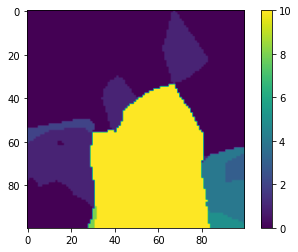

In [103]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

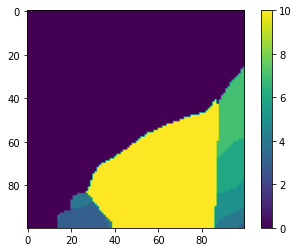

In [99]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

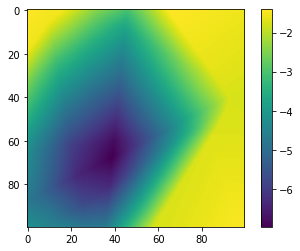

In [89]:
plt.imshow(Qvals[:,:,4]) 
plt.colorbar()